In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Task 2

In [2]:
vertices = np.array([
    [2, 2], [4, 3], [5, 5], [4, 7], [2, 8], [1, 7], [0.5, 5], [1, 3]
]) 

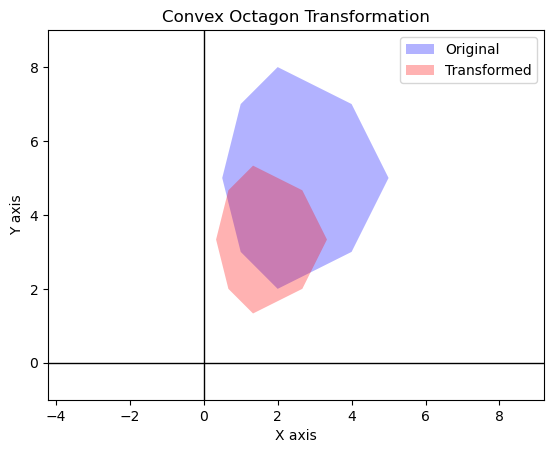

In [3]:
# define the scaling matrix for reducing the shape size by 1.5 times
# in homogeneous coordinates, the matrix for scaling by a factor of s is:
# [s 0 0]
# [0 s 0]
# [0 0 1]
s = 2/3  # to reduce by 1.5 times, we scale by 2/3
scaling_matrix = np.array([
    [s, 0, 0],
    [0, s, 0],
    [0, 0, 1]
])

# convert vertices to homogeneous coordinates (add a row of ones)
homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))

# apply the transformation
transformed_vertices = homogeneous_vertices.dot(scaling_matrix).astype(float)

# extract the x and y coordinates of the transformed vertices
transformed_vertices = transformed_vertices[:, :2]

# plotting
fig, ax = plt.subplots()
ax.fill(vertices[:, 0], vertices[:, 1], 'b', alpha=0.3, label='Original')
ax.fill(transformed_vertices[:, 0], transformed_vertices[:, 1], 'r', alpha=0.3, label='Transformed')

# draw coordinate axes for clarity
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

# set equal scaling and limits to see the entire picture without changing the scale
ax.axis('equal')
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 9)

ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('Convex Octagon Transformation')

plt.show()

## Task 3

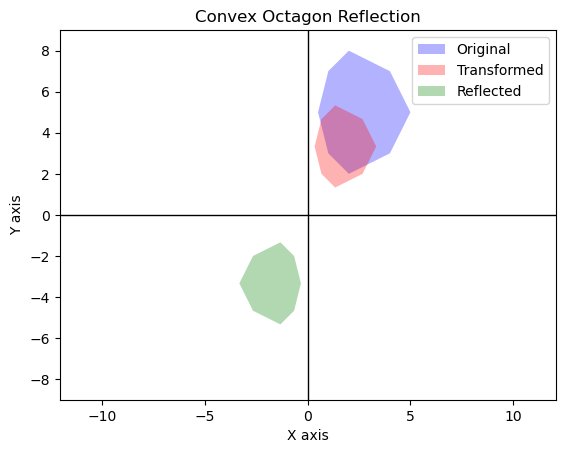

In [5]:
# define the reflection matrix for reflecting across the origin in homogeneous coordinates
# reflection across the origin negates both x and y coordinates:
# [-1  0  0]
# [ 0 -1  0]
# [ 0  0  1]
reflection_matrix = np.array([
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])

# apply the reflection transformation to the previously transformed vertices
reflected_vertices = transformed_vertices.dot(reflection_matrix[:2, :2])

# plotting 
fig, ax = plt.subplots()
ax.fill(vertices[:, 0], vertices[:, 1], 'b', alpha=0.3, label='Original')
ax.fill(transformed_vertices[:, 0], transformed_vertices[:, 1], 'r', alpha=0.3, label='Transformed')
ax.fill(reflected_vertices[:, 0], reflected_vertices[:, 1], 'g', alpha=0.3, label='Reflected')

ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

ax.axis('equal')
ax.set_xlim(-6, 6)
ax.set_ylim(-9, 9)

ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('Convex Octagon Reflection')

plt.show()

## Task 4 

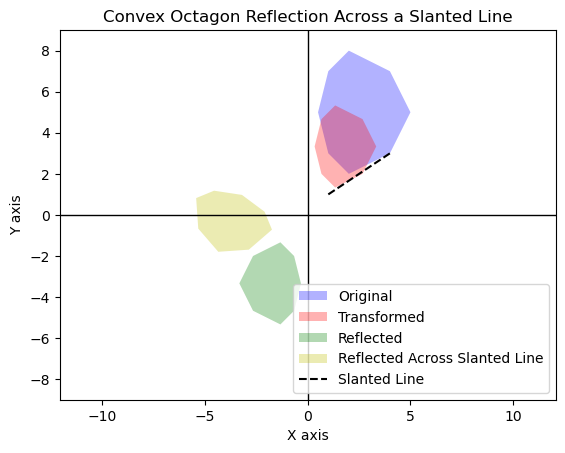

In [5]:
# define two points that define the slanted line
P1 = np.array([1, 1])
P2 = np.array([4, 3])

# step 1: Translate the line so that P1 moves to the origin
translation_matrix = np.array([
    [1, 0, -P1[0]],
    [0, 1, -P1[1]],
    [0, 0, 1]
])

# step 2: Rotate the line to align with the X-axis
# calculate the angle of rotation
angle = np.arctan2(P2[1] - P1[1], P2[0] - P1[0])
rotation_matrix = np.array([
    [np.cos(-angle), -np.sin(-angle), 0],
    [np.sin(-angle), np.cos(-angle), 0],
    [0, 0, 1]
])

# step 3: Reflect across the X-axis
reflection_matrix_x_axis = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])

# combine transformations for reflection across the slanted line
combined_transformation = np.dot(np.dot(np.dot(np.dot(np.linalg.inv(translation_matrix), 
                                                      np.linalg.inv(rotation_matrix)), reflection_matrix_x_axis), 
                                                                                  rotation_matrix), translation_matrix)

# apply the combined transformation to the previously transformed (and reflected) vertices
homogeneous_reflected_vertices = np.hstack((reflected_vertices, np.ones((reflected_vertices.shape[0], 1))))
reflected_again_vertices = homogeneous_reflected_vertices.dot(combined_transformation).astype(float)[:, :2]

# plotting 
fig, ax = plt.subplots()
ax.fill(vertices[:, 0], vertices[:, 1], 'b', alpha=0.3, label='Original')
ax.fill(transformed_vertices[:, 0], transformed_vertices[:, 1], 'r', alpha=0.3, label='Transformed')
ax.fill(reflected_vertices[:, 0], reflected_vertices[:, 1], 'g', alpha=0.3, label='Reflected')
ax.fill(reflected_again_vertices[:, 0], reflected_again_vertices[:, 1], 'y', alpha=0.3, label='Reflected Across Slanted Line')

# draw slanted line
ax.plot([P1[0], P2[0]], [P1[1], P2[1]], 'k--', label='Slanted Line')

ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)

ax.axis('equal')
ax.set_xlim(-6, 6)
ax.set_ylim(-9, 9)

ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('Convex Octagon Reflection Across a Slanted Line')

plt.show()

## Task 6

In [6]:
# load the Excel file
file_path = 'C:\\Users\\Rock4\\Downloads\\Варіанти.xlsx'
df = pd.read_excel(file_path, sheet_name=None)  # load all sheets

df.keys()

dict_keys(['Var_01', 'Var_02', 'Var_03', 'Var_04', 'Var_05', 'Var_06', 'Var_07'])

In [7]:
df_var_01 = df['Var_01']
df_var_01

,X,Y
0,112.219,100.749
1,111.713,101.474
2,111.092,102.250
3,110.511,102.887
4,109.896,103.489
...,...,...
607,114.557,100.570
608,114.435,100.862
609,114.030,101.524
610,114.030,101.600


In [8]:
vertices = df_var_01.to_numpy()

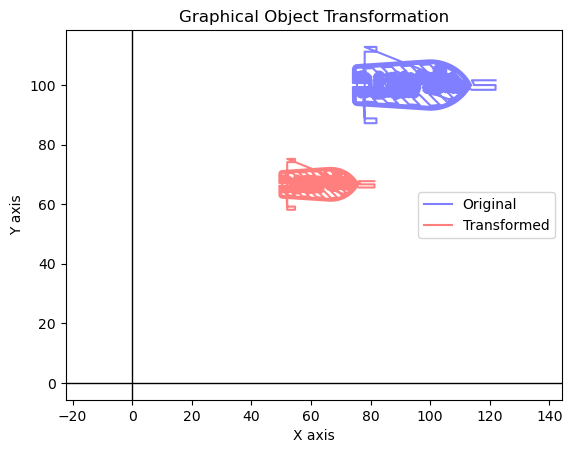

In [9]:
s = 2/3 
scaling_matrix = np.array([
    [s, 0, 0],
    [0, s, 0],
    [0, 0, 1]
])

homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
transformed_vertices = homogeneous_vertices.dot(scaling_matrix).astype(float)
transformed_vertices = transformed_vertices[:, :2]

fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'b', alpha=0.5, label='Original')
ax.plot(transformed_vertices[:, 0], transformed_vertices[:, 1], 'r', alpha=0.5, label='Transformed')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.axis('equal')
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('Graphical Object Transformation')
plt.show()

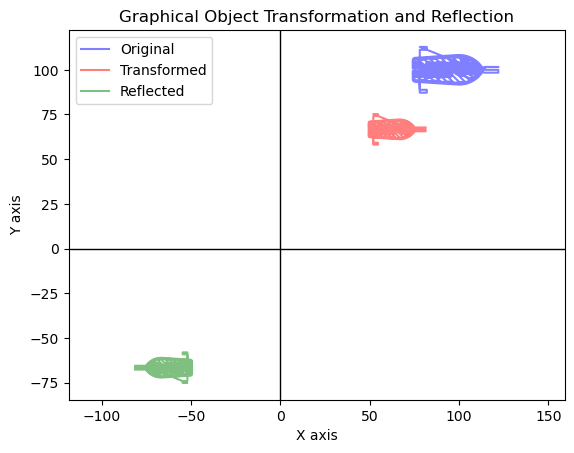

In [10]:
reflection_matrix = np.array([
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])

# need to reconvert the transformed vertices to homogeneous coordinates to apply the reflection matrix
homogeneous_transformed_vertices = np.hstack((transformed_vertices, np.ones((transformed_vertices.shape[0], 1))))
reflected_vertices = homogeneous_transformed_vertices.dot(reflection_matrix).astype(float)

# extract the x and y coordinates of the reflected vertices
reflected_vertices = reflected_vertices[:, :2]

fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'b', alpha=0.5, label='Original')
ax.plot(transformed_vertices[:, 0], transformed_vertices[:, 1], 'r', alpha=0.5, label='Transformed')
ax.plot(reflected_vertices[:, 0], reflected_vertices[:, 1], 'g', alpha=0.5, label='Reflected')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.axis('equal')
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('Graphical Object Transformation and Reflection')
plt.show()

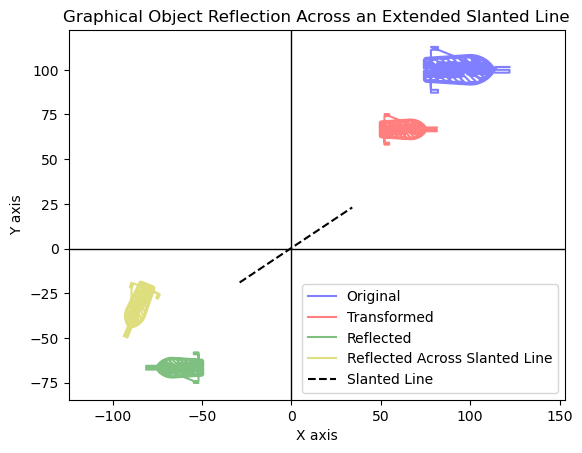

In [11]:
P1 = np.array([1, 1])
P2 = np.array([4, 3])

translation_matrix = np.array([
    [1, 0, -P1[0]],
    [0, 1, -P1[1]],
    [0, 0, 1]
])

angle = np.arctan2(P2[1] - P1[1], P2[0] - P1[0])
rotation_matrix = np.array([
    [np.cos(-angle), -np.sin(-angle), 0],
    [np.sin(-angle), np.cos(-angle), 0],
    [0, 0, 1]
])

reflection_matrix_x_axis = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])

combined_transformation = np.dot(np.dot(np.dot(np.dot(np.linalg.inv(translation_matrix), 
                                                      np.linalg.inv(rotation_matrix)), reflection_matrix_x_axis), 
                                                                                  rotation_matrix), translation_matrix)

homogeneous_reflected_vertices = np.hstack((reflected_vertices, np.ones((reflected_vertices.shape[0], 1))))
reflected_again_vertices = homogeneous_reflected_vertices.dot(combined_transformation).astype(float)[:, :2] 

# extend the slanted line for better visualization
# calculate direction vector of the line
direction = P2 - P1
# extend the line in both directions
extended_P1 = P1 - 10 * direction
extended_P2 = P2 + 10 * direction

fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'b', alpha=0.5, label='Original')
ax.plot(transformed_vertices[:, 0], transformed_vertices[:, 1], 'r', alpha=0.5, label='Transformed')
ax.plot(reflected_vertices[:, 0], reflected_vertices[:, 1], 'g', alpha=0.5, label='Reflected')
ax.plot(reflected_again_vertices[:, 0], reflected_again_vertices[:, 1], 'y', alpha=0.5, label='Reflected Across Slanted Line')
ax.plot([extended_P1[0], extended_P2[0]], [extended_P1[1], extended_P2[1]], 'k--', label='Slanted Line')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.axis('equal')
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('Graphical Object Reflection Across an Extended Slanted Line')
plt.show() 